# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
previsao_renda = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv') #carregando os dados
previsao_renda.head() 

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [20]:
previsao_renda.info() #obtendo infos da df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


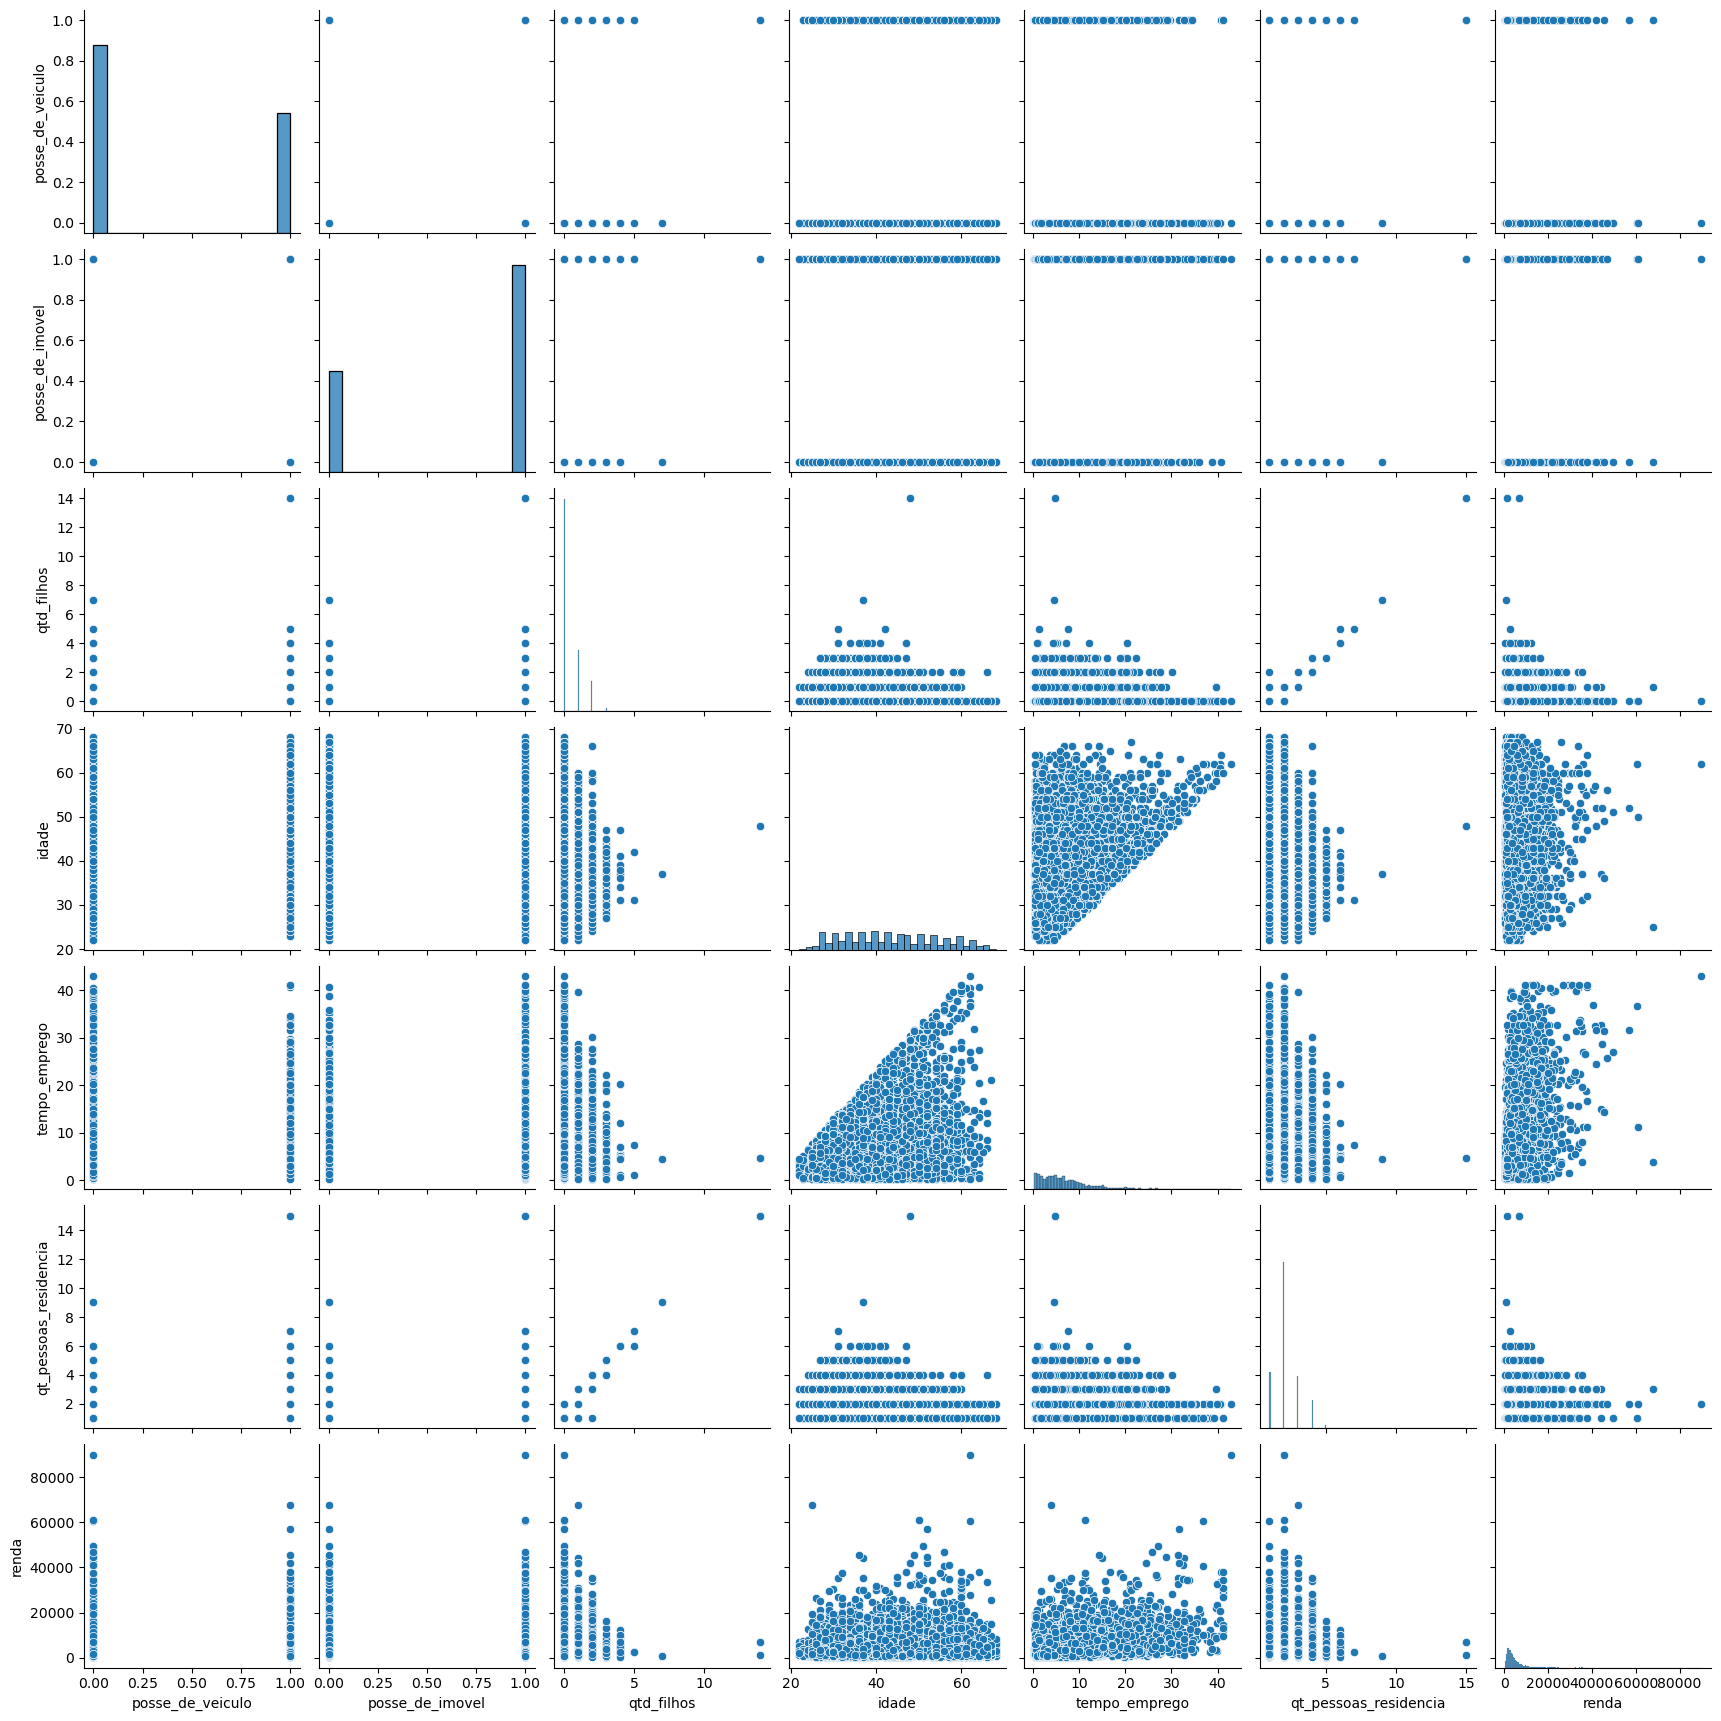

In [11]:
sns.pairplot(data = previsao_renda) 

#plotando pairplot. O resultado não foi satisfatório. são muitas variáveis e fica difícil retirar algum insight

In [21]:
#removendo variáveis que dificultam a análise, ou simplesmente não são úteis para essa atividade, como orientado: 'index', 'Unnamed', 'mau'

previsao_renda = previsao_renda.drop(['index', 'mau', 'Unnamed: 0'], axis = 1)

In [22]:
previsao_renda.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


C:\Users\khrik\AppData\Local\Temp\ipykernel_15040\2785805504.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(previsao_renda.corr(), figsize=(8, 8), center = 0, cmap=cmap)


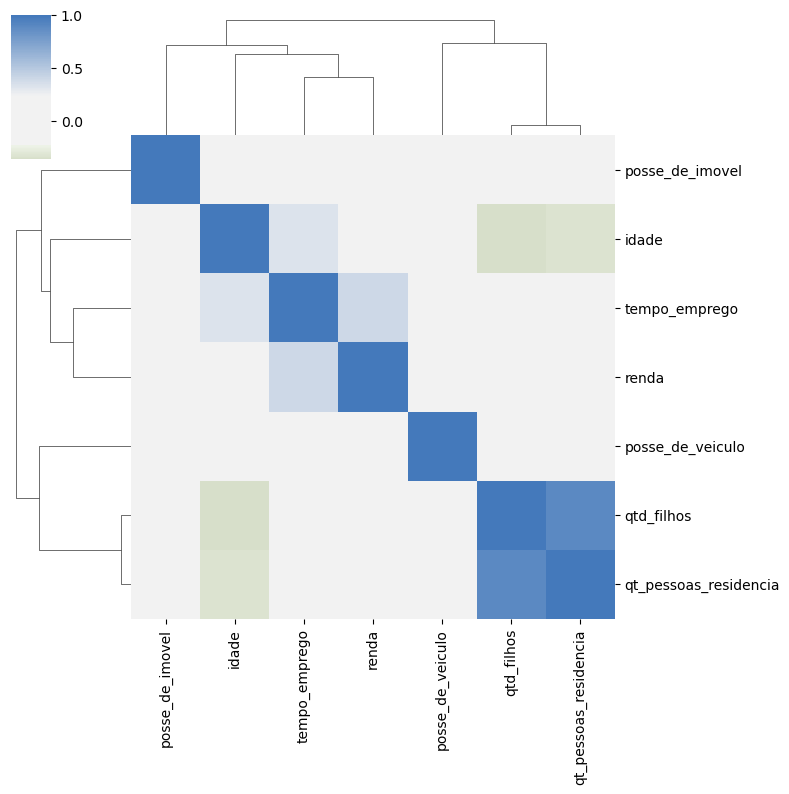

In [8]:
cmap = sns.diverging_palette(h_neg=105, h_pos=250, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(previsao_renda.corr(), figsize=(8, 8), center = 0, cmap=cmap)

<Axes: xlabel='qt_pessoas_residencia', ylabel='qtd_filhos'>

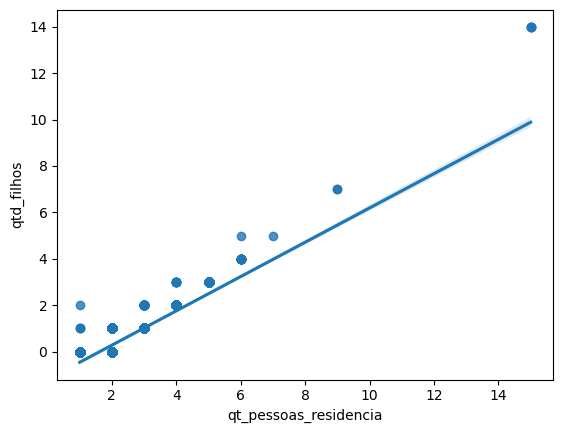

In [32]:
sns.regplot(x = 'qt_pessoas_residencia', y = 'qtd_filhos', data = previsao_renda) 

# as variáveis com maior correlação

<Axes: xlabel='idade', ylabel='tempo_emprego'>

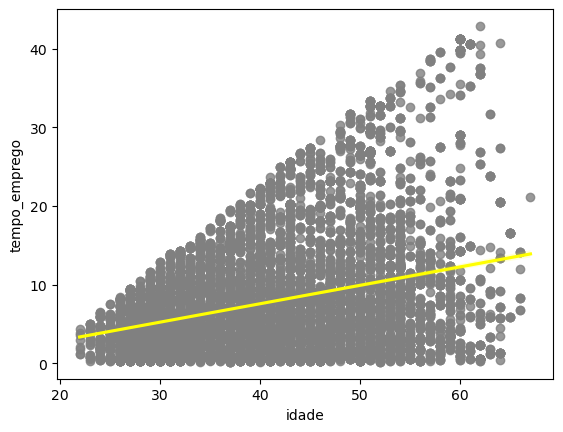

In [28]:
sns.regplot(x = 'idade', y = 'tempo_emprego', data = previsao_renda,
           scatter_kws={"color": "grey"}, line_kws={"color": 'yellow'})

# variáveis com alta correlação

<Axes: xlabel='renda', ylabel='tempo_emprego'>

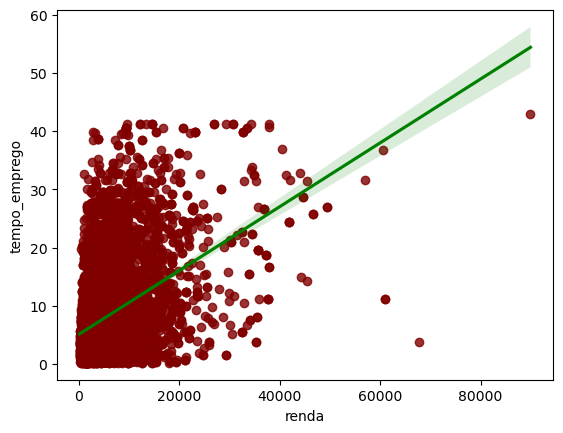

In [30]:
sns.regplot(x = 'renda', y = 'tempo_emprego', data = previsao_renda,
           scatter_kws={"color": "maroon"}, line_kws={"color": 'green'})

### Insights
- Como observado nos gráficos, a variável renda parece ter uma correlação positiva quando correlacionada com a variável tempo de emprego. 
- Há uma concentração de clientes com renda abaixo de 20.000 não importando muito o tempo de emprego.
- Clientes com mais tempo de empregamento parecem tender a uma renda maior. 
- No entanto, há alguns outliers que tem renda enre 60.000 e 80.000, mas que têm um tempo de emprego inferior a 15
- A idade não tem correlação direta com a renda nessa base de dados. Mas quão mais velho o cliente mais tempo de emprego e a renda poderá aumentar de forma discreta.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

,renda,tempo_emprego
renda,1.000000,0.394235
tempo_emprego,0.394235,1.000000


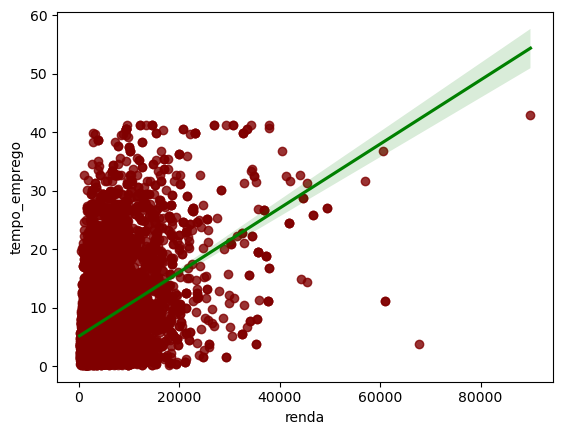

In [36]:
_ = sns.regplot(x = 'renda', y = 'tempo_emprego', data = previsao_renda,
           scatter_kws={"color": "maroon"}, line_kws={"color": 'green'})

previsao_renda[["renda","tempo_emprego"]].corr()

,renda,idade
renda,1.00000,0.04257
idade,0.04257,1.00000


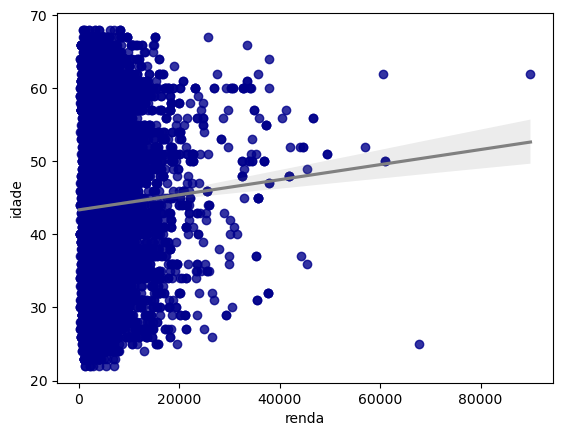

In [37]:
_ = sns.regplot(x = 'renda', y = 'idade', data = previsao_renda,
           scatter_kws={"color": "darkblue"}, line_kws={"color": 'gray'})

previsao_renda[["renda","idade"]].corr()

,idade,tempo_emprego
idade,1.000000,0.323934
tempo_emprego,0.323934,1.000000


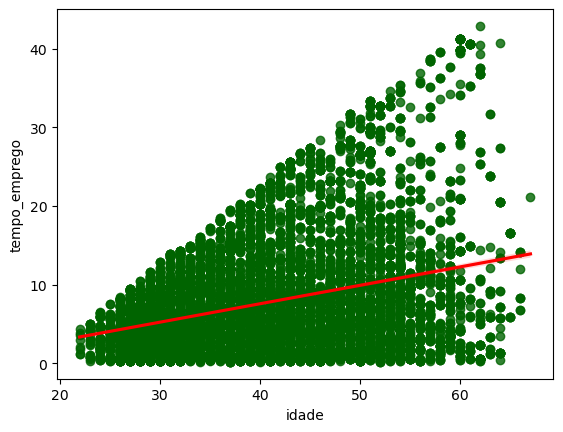

In [38]:
_ = sns.regplot(x = 'idade', y = 'tempo_emprego', data = previsao_renda,
           scatter_kws={"color": "darkgreen"}, line_kws={"color": 'red'})

previsao_renda[["idade","tempo_emprego"]].corr()

###Insigths

- Quanto maior a idade maior o tempo de emprego. Esta correlação é positiva, e, em perspectiva, de fato quanto mais velha um pessoa, maior a probabilidade de aumentar o tempo de trabalho.
- Há uma concentração maior de pessoas com mais de 60 de idade abaixo de 10 anos de tempo de emprego.

3) Na sua opinião, há outliers na variável renda?

In [28]:
previsao_renda.renda.describe()
#identificar algumas stats descritivos da variável

count    15000.000000
mean      4624.632946
std       4628.571729
min        159.900000
25%       1945.740000
50%       3278.260000
75%       5642.365000
max      89918.040000
Name: renda, dtype: float64

In [29]:
previsao_renda.renda.median()
# identificar a mediana para saber se o máximo ou mínimo estão muito distantes

3278.26

<Axes: >

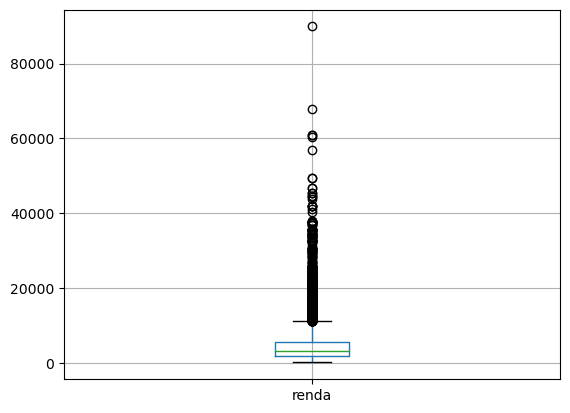

In [31]:
previsao_renda.boxplot("renda") 
# plotar um boxplot para identificar a distribuição das observações da variável renda

,renda,tempo_emprego
renda,1.000000,0.394235
tempo_emprego,0.394235,1.000000


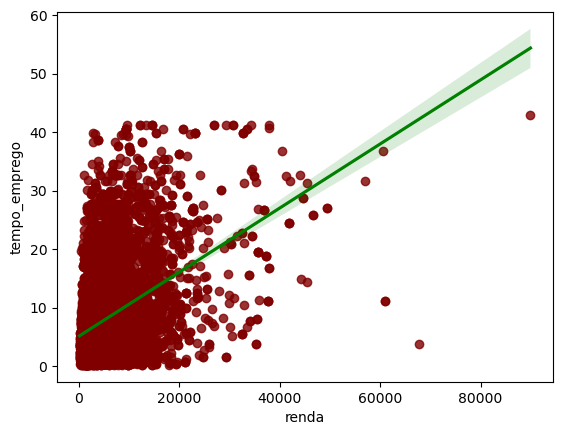

In [39]:
_ = sns.regplot(x = 'renda', y = 'tempo_emprego', data = previsao_renda,
           scatter_kws={"color": "maroon"}, line_kws={"color": 'green'})

previsao_renda[["renda","tempo_emprego"]].corr()

### Insigths

- A partir de todos os gráficos plotados até aqui, é possível afirmar que há ao menos 1 outlier. Uma observação que está acima de 80.000. No entanto, existe uma outra que está mais próxima de 70.000, mas não consigo avaliar no momento como um outlier
- As demais observações estão agrupadas de alguma forma.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [41]:
df1 = previsao_renda[["renda","tempo_emprego"]].copy() 
df1_log = df1.copy()
# criando uma df só com a variável renda e tempo_emprego, as quais têm correlação perfeita positiva

In [42]:
df1_log['log_renda'] = np.log(df1_log['renda'])

#aplicando log na variável renda

,renda,tempo_emprego,log_renda
renda,1.000000,0.394235,0.835734
tempo_emprego,0.394235,1.000000,0.379556
log_renda,0.835734,0.379556,1.000000


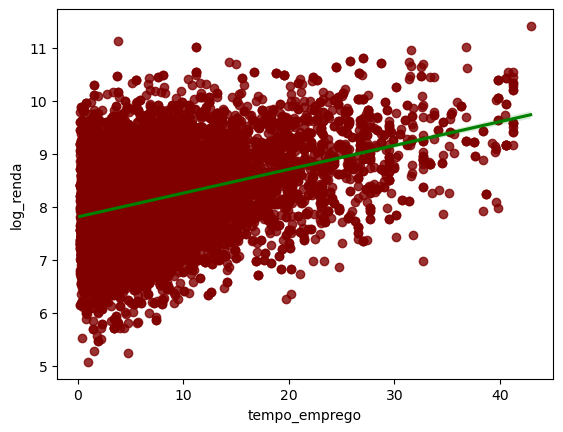

In [44]:
_ = sns.regplot(x='tempo_emprego', y='log_renda', data = df1_log,
               scatter_kws={"color": "maroon"}, line_kws={"color": 'green'})

df1_log.corr()

#plotando scatterplot com log de renda

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

- A aplicação do log facilitou a análise na medida em que agora é possível identificar uma distribuição melhor em torno da variável renda.
- A variável tempo_emprego agora parece ter uma correlação mais fácil de ser observada com renda.
- O outlier parece ter sido resolvido, no entanto, surgiu uma nova observação com posição acima de 40 em tempo_emprego e 11 em log_renda. A curva de regressão ainda indica uma correlação positiva com pouca variância.